In [61]:
import pandas as pd

pd.options.mode.chained_assignment = None
file_path = "C:/Users/HassanAlhawari/OneDrive - JAEMACOM GmbH/Desktop/sf-crime/train.csv/train.csv"
# read csv
df = pd.read_csv(file_path)
crimes_we_need = ["LARCENY/THEFT", "ASSAULT", "DRUG/NARCOTIC", "VEHICLE THEFT", "BURGLARY"]
filter_df = df[df['Category'].isin(crimes_we_need)]
filter_df

In [62]:
# Introducing a "political direction" feature to examine whether crime rates correlate
# with specific governmental policies
filter_df['POLITICAL DIRECTION'] = filter_df['Dates'].map(lambda x: 'REPUBLIC' if (dt := pd.to_datetime(x)).year == 2009 and dt.month == 1 else 'DEMOCRATIC')

filter_df

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,POLITICAL DIRECTION
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,DEMOCRATIC
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,DEMOCRATIC
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,DEMOCRATIC
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,DEMOCRATIC
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,DEMOCRATIC
...,...,...,...,...,...,...,...,...,...,...
878036,2003-01-06 00:55:00,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Monday,NORTHERN,NONE,1300 Block of WEBSTER ST,-122.431046,37.783030,DEMOCRATIC
878040,2003-01-06 00:33:00,ASSAULT,INFLICT INJURY ON COHABITEE,Monday,MISSION,NONE,2800 Block of FOLSOM ST,-122.414073,37.751685,DEMOCRATIC
878042,2003-01-06 00:20:00,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564,DEMOCRATIC
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,DEMOCRATIC


In [ ]:
# We possess a dataset depicting the weather conditions in San Francisco. However, before delving
# into the analysis, a series of preprocessing steps is required to filter out extraneous weather
# data.

#weather_file_path = "C:/Users/HassanAlhawari/OneDrive - JAEMACOM GmbH/Desktop/sf-crime/weather_sanfrancisco.csv"

weather_file_path = "weather_sanfrancisco_filtered.csv"

weather_df = pd.read_csv(weather_file_path)
weather_df['Date'] = pd.to_datetime(weather_df['Date'])
filter_weather_df = weather_df[weather_df['Date'].dt.year >= 2003]

filter_weather_df

#filter_weather_df.to_csv('C:/Users/HassanAlhawari/OneDrive - JAEMACOM
# GmbH/Desktop/sf-crime/weather_sanfrancisco_filtered.csv', index=False)

In [64]:
# We are currently in the process of integrating two datasets. Specifically, we are extracting
# Temperature, Humidity, Events and Season information from the weather dataset and merging it
# with the crime datasets by Dates.

filter_df['temp_Date'] = pd.to_datetime(filter_df['Dates'].str[:10])
filter_df = pd.merge(filter_df, filter_weather_df[['Date','Min.TemperatureF', 'Mean.TemperatureF','Max.TemperatureF','Mean.Humidity','Events', 'season']], left_on='temp_Date', right_on='Date', how='left')
filter_df.drop('Date', axis=1, inplace=True)
filter_df.drop('temp_Date', axis=1, inplace=True)

# The new overwritten Dataset contains 2 features {Political Directions and Weather data}
filter_df


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,POLITICAL DIRECTION,Min.TemperatureF,Mean.TemperatureF,Max.TemperatureF,Mean.Humidity,Events,season
0,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,DEMOCRATIC,52.0,59.0,65,61.0,NaN,Spring
1,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,DEMOCRATIC,52.0,59.0,65,61.0,NaN,Spring
2,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,DEMOCRATIC,52.0,59.0,65,61.0,NaN,Spring
3,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,DEMOCRATIC,52.0,59.0,65,61.0,NaN,Spring
4,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,DEMOCRATIC,52.0,59.0,65,61.0,NaN,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396278,2003-01-06 00:55:00,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Monday,NORTHERN,NONE,1300 Block of WEBSTER ST,-122.431046,37.783030,DEMOCRATIC,51.0,58.0,66,55.0,NaN,Winter
396279,2003-01-06 00:33:00,ASSAULT,INFLICT INJURY ON COHABITEE,Monday,MISSION,NONE,2800 Block of FOLSOM ST,-122.414073,37.751685,DEMOCRATIC,51.0,58.0,66,55.0,NaN,Winter
396280,2003-01-06 00:20:00,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564,DEMOCRATIC,51.0,58.0,66,55.0,NaN,Winter
396281,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,DEMOCRATIC,51.0,58.0,66,55.0,NaN,Winter


<Figure size 1000x800 with 0 Axes>

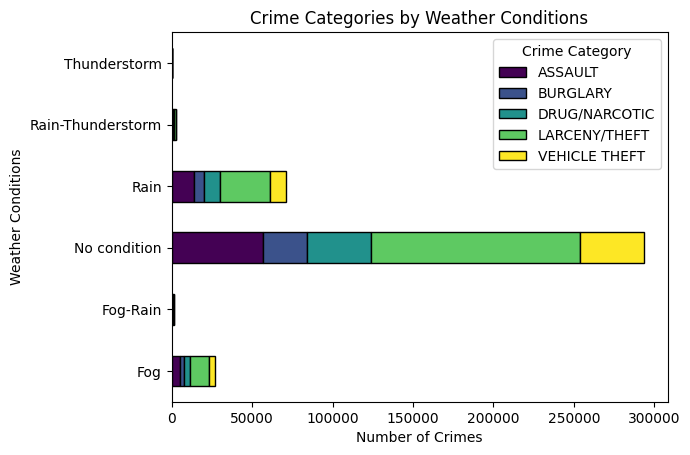

In [87]:
# Let us undertake a data visualization analysis to elucidate the correlation between crime
# rates and specific meteorological conditions

import matplotlib.pyplot as plt
filter_df['Events'].fillna('Clear', inplace=True)
grouped_data = filter_df.groupby('Events')['Category'].value_counts().unstack()

plt.figure(figsize=(10, 8))
grouped_data.plot(kind='barh', stacked=True, colormap='viridis', edgecolor='black')
plt.title('Crime Categories by Weather Conditions')
plt.xlabel('Number of Crimes')
plt.ylabel('Weather Conditions')
plt.legend(title='Crime Category')

plt.show()

In [66]:
# Crime rates show a distinct pattern based on weather conditions. More crimes tend to happen
# during clear weather, followed by an increase during rainy days as the second most common
# scenario. Foggy conditions come next, ranking third in terms of crime frequency. Surprisingly
# the fewest crimes occur during thunderstorms, presenting a notable contrast to other weather
# situations.

In [74]:
# We are creating the contingence table for further research
contingency_table = pd.crosstab(filter_df['Category'], filter_df['Events'])
contingency_table

Events,Fog,Fog-Rain,No condition,Rain,Rain-Thunderstorm,Thunderstorm
Category,,,,,,
ASSAULT,5151,298,57055,13733,601,38
BURGLARY,2506,142,27063,6741,282,21
DRUG/NARCOTIC,3635,240,39884,9733,455,24
LARCENY/THEFT,12267,683,129875,30711,1235,129
VEHICLE THEFT,3550,259,39575,9923,450,24


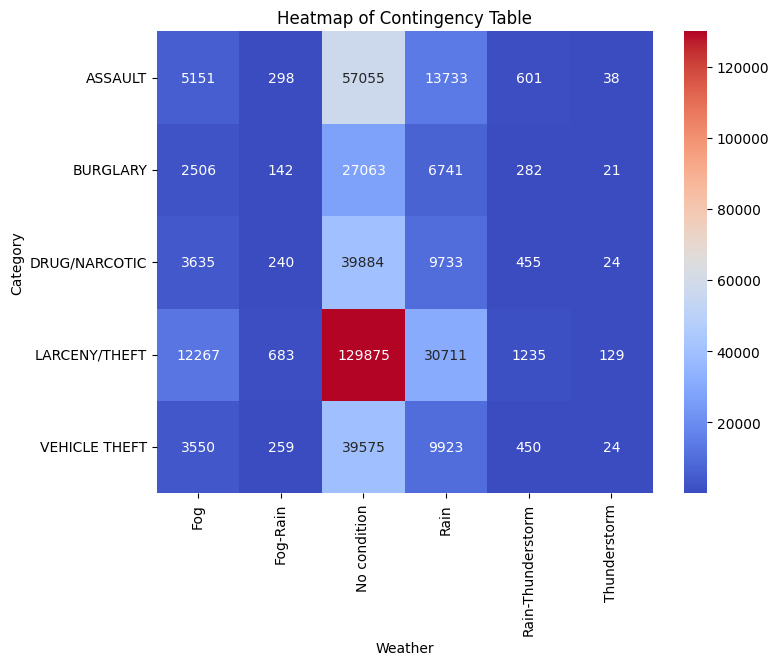

In [80]:
# The heatmap provides a visual representation that allows us to discern the association between
# two categorical variables.
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title('Heatmap of Contingency Table')
plt.xlabel('Weather')
plt.ylabel('Category')
plt.show()

In [71]:
# Now we're more curious about whether weather has any impact on crime rates. To find out, let's
# use the Chi-Square (Chi²) test to see if there's a meaningful connection between two things:
# Weather and Crimes.
# Quelle: https://analyticsindiamag.com/how-to-use-the-chi-square-test-for-two-categorical-variables/
# We are using the chi2_contingency package which is useful to calculate the p-value
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Quadrat-Wert: {chi2}")
print(f"P-Wert: {p}")


Chi-Quadrat-Wert: 83.03607357861694
P-Wert: 1.1912442344550702e-09


In [84]:
# The Chi-Square test shows a strong association between crime categories and weather condition.
# Typically less than 0.05 indicates that the observed association is unlikely to be due to
# random chance (actual value: 1.1912442344550702e-09), leading to the rejection of the null
# hypothesis. In summary, there is a significant relationship between crime categories and
# weather conditions in the dataset. Since we dont know how strong the relationship is, we will
# look further into it with Cramérs V-Value: https://www.geeksforgeeks.org/how-to-calculate-cramers-v-in-python/

import numpy as np

X2 = chi2_contingency(contingency_table, correction=False)[0]
N = np.sum(contingency_table)
minimum_dimension = min(contingency_table.shape)-1

# result of Cramers V
result = np.sqrt((X2/N) / minimum_dimension)

result


Events
Fog                  0.027672
Fog-Rain             0.113130
No condition         0.008411
Rain                 0.017118
Rain-Thunderstorm    0.082868
Thunderstorm         0.296584
dtype: float64

In [ ]:
# The Cramer's V values show how different types of weather are connected. "Thunderstorm" is
# strongly linked to other conditions like "Rain," while "No Condition," "Fog," and
# "Rain-Thunderstorm" are less connected to the rest. These values help us understand how
# certain weather events are more influential in affecting other conditions

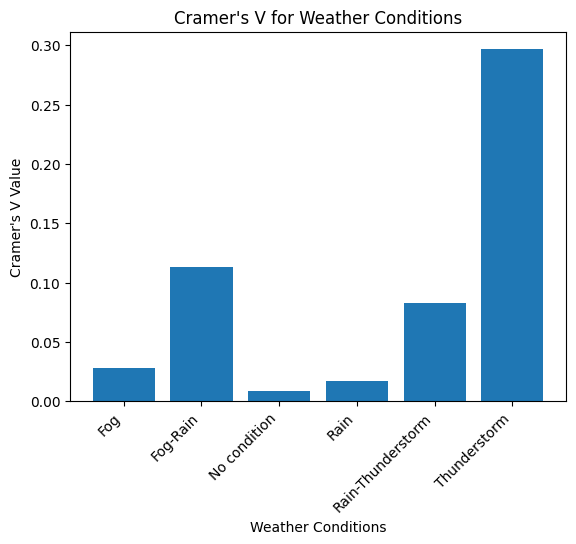

In [86]:
# We will visualize the strength from Cramer's V
labels = contingency_table.columns  # Assuming columns represent different weather conditions
plt.bar(labels, result)
plt.xlabel('Weather Conditions')
plt.xticks(rotation=45, ha='right')

plt.ylabel("Cramer's V Value")
plt.title("Cramer's V for Weather Conditions")
plt.show()

In [ ]:
# We can see that the weather plays a big role in crimes. We used a method called Chi-Square to
# check the connection between crimes and different weather conditions. It turns out that most
# crimes happen when the weather is clear. But when we used Cramer's calculation, we found
# something interesting – Thunderstorms are linked the strongest with crimes. This tells us that
# the kind of weather really matters when it comes to crime.



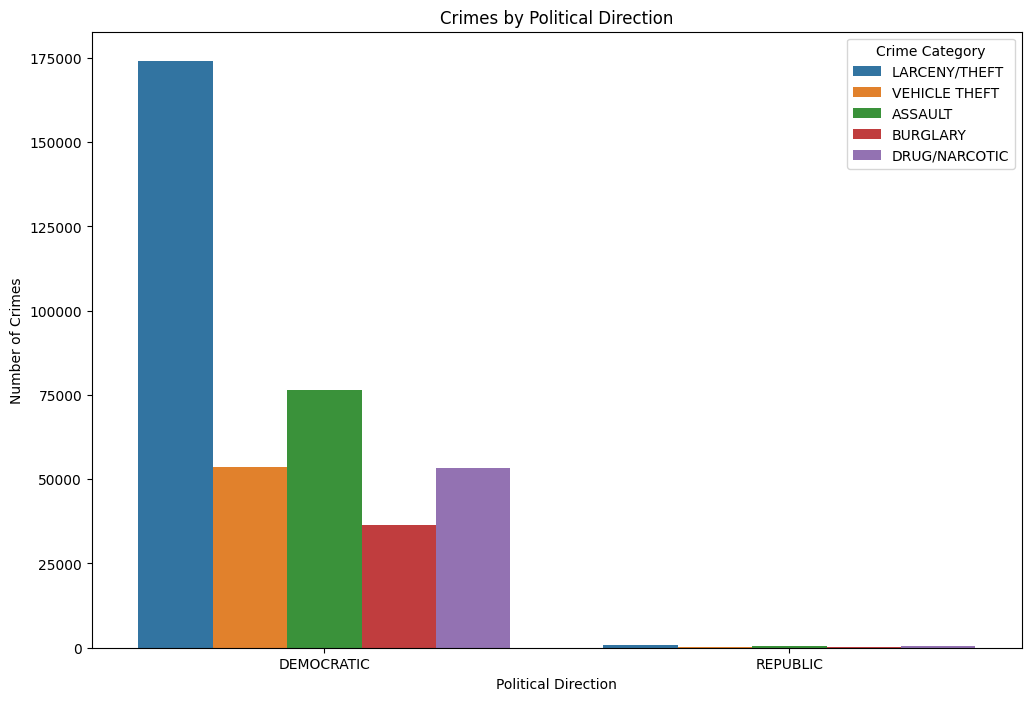

In [90]:
# Having explored the impact of weather conditions, we will now shift our focus to another feature: 'political directions'.

filter_df

plt.figure(figsize=(12, 8))
sns.countplot(x='POLITICAL DIRECTION', hue='Category', data=filter_df)
plt.title('Crimes by Political Direction')
plt.xlabel('Political Direction')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Category', loc='upper right')
plt.show()

In [ ]:
# Continue and recheck the dataset